<a href="https://colab.research.google.com/github/smart-stats/ds4bio_book/blob/main/book/pytorch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/smart-stats/ds4bio_book/HEAD)

# Pytorch by example

This example from the pytorch documentation [here](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) displays generating random y ad x dat and fitting a multi-layer neural network. We're going to consider a regression problem, but using a two layer neural network to solve it. Consider something like this. We have 5 inputs; those get passed to 3 hidden nodes, those get RELU'd, which get passed to an output.

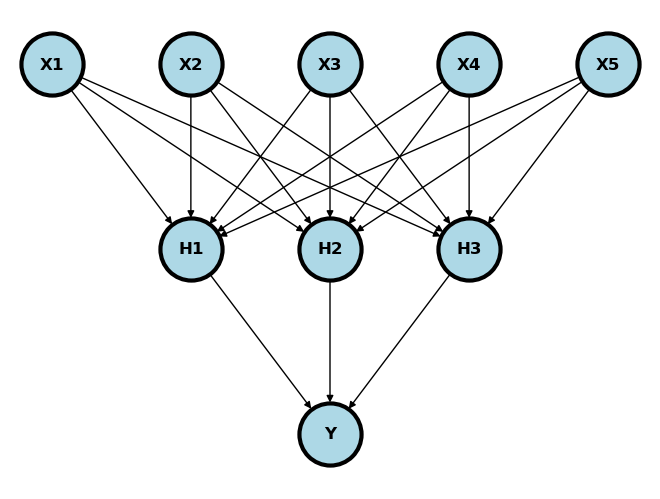

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl

#plt.figure(figsize=[2, 2])
G = nx.DiGraph()
G.add_node("X1",  pos = (0, 2) )
G.add_node("X2",  pos = (1, 2) )
G.add_node("X3",  pos = (2, 2) )
G.add_node("X4",  pos = (3, 2) )
G.add_node("X5",  pos = (4, 2) )

G.add_node("H1",  pos = (1, 1) )
G.add_node("H2",  pos = (2, 1) )
G.add_node("H3",  pos = (3, 1) )
G.add_node("Y" ,  pos = (2, 0) )

G.add_edges_from([ ("X1", "H1"), ("X2", "H1"), ("X3", "H1"),  ("X4", "H1"), ("X5", "H1")])
G.add_edges_from([ ("X1", "H2"), ("X2", "H2"), ("X3", "H2"),  ("X4", "H2"), ("X5", "H2")])
G.add_edges_from([ ("X1", "H3"), ("X2", "H3"), ("X3", "H3"),  ("X4", "H3"), ("X5", "H3")])
G.add_edges_from([ ("H1",  "Y"), ("H2",  "Y"), ("H3", "Y")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 2000,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.3, 4.3])
ax.set_ylim([-.3, 2.3])
plt.show()

Below, we create an example. It isn't terribly interesting, since the X and the Y aren't related at all. But, it does show us some useful code.

In [2]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
sns.set()


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1000, 128, 32, 8

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(1000):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 4528.63818359375
199 3238.584716796875
299 3374.392333984375


399 2921.04736328125
499 2942.135498046875
599 2804.49462890625
699 2643.803466796875


799 2589.518798828125
899 2602.940673828125
999 2472.806640625


Let's update that example for our setting using the voxel level data.

In [3]:
## Read in the data and display a few rows
dat = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")

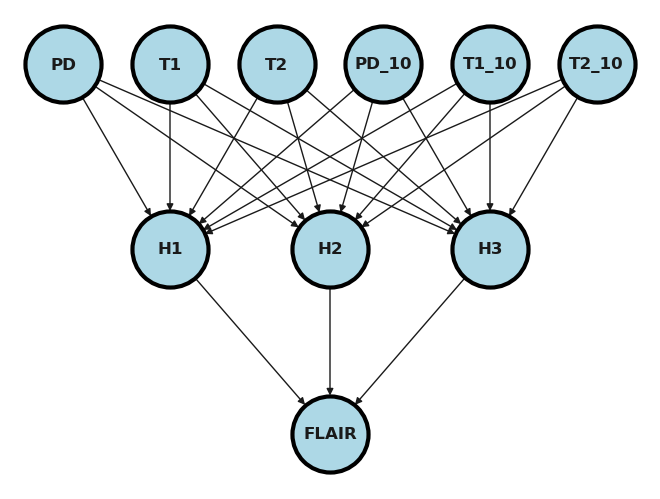

In [4]:
G = nx.DiGraph()
G.add_node("PD",     pos = (0, 2) )
G.add_node("T1",     pos = (1, 2) )
G.add_node("T2",     pos = (2, 2) )
G.add_node("PD_10",  pos = (3, 2) )
G.add_node("T1_10",  pos = (4, 2) )
G.add_node("T2_10",  pos = (5, 2) )

G.add_node("H1",  pos = (1.0, 1) )
G.add_node("H2",  pos = (2.5, 1) )
G.add_node("H3",  pos = (4.0, 1) )

G.add_node("FLAIR" ,  pos = (2.5, 0) )

G.add_edges_from([ ("PD", "H1"), ("T1", "H1"), ("T2", "H1"),  ("PD_10", "H1"), ("T1_10", "H1"), ("T2_10", "H1")])
G.add_edges_from([ ("PD", "H2"), ("T1", "H2"), ("T2", "H2"),  ("PD_10", "H2"), ("T1_10", "H2"), ("T2_10", "H2")])
G.add_edges_from([ ("PD", "H3"), ("T1", "H3"), ("T2", "H3"),  ("PD_10", "H3"), ("T1_10", "H3"), ("T2_10", "H3")])

G.add_edges_from([ ("H1",  "FLAIR"), ("H2",  "FLAIR"), ("H3", "FLAIR")])
nx.draw(G, 
        nx.get_node_attributes(G, 'pos'), 
        with_labels=True, 
        font_weight='bold', 
        node_size = 3000,
        node_color = "lightblue",
        linewidths = 3)
ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")
ax.set_xlim([-.5, 5.5])
ax.set_ylim([-.3, 2.3])
plt.show()

Let's set the training fraction at 75% (and thus the testing fraction at 25%). This gives us relatively little data to fit with. Thus, a relatively simple model makes sense.

In [5]:
trainFraction = .75

sample = np.random.uniform(size = 100) < trainFraction
trainingDat = dat[sample]
testingDat = dat[~sample]


Next we need to get the data into a pytorch size and fram

In [6]:
x = torch.from_numpy(dat[['PD','T1', 'T2', 'T1_10', 'T2_10', ]].values)
y = torch.from_numpy(dat[['FLAIR']].values)

##pytorch wants type as float
x = x.float()
y = y.float()

xtraining = x[sample]
xtesting = x[~sample]
ytraining = y[sample]
ytesting = y[~sample]

[
 xtraining.size(),
 ytraining.size(),
 xtesting.size(),
 ytesting.size(),
]

[torch.Size([83, 5]),
 torch.Size([83, 1]),
 torch.Size([17, 5]),
 torch.Size([17, 1])]

In [7]:
## Define the model
## Dimension of the hidden layer
H = 3

## Number of predictors
D_in = xtraining.size()[1]
D_out = 1

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)



In [8]:
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(100000):
    y_pred = model(xtraining)
    loss = loss_fn(y_pred, ytraining)
    if t % 10000 == 0:
        print(t, loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad


0 437.9674072265625


10000 31.781356811523438


20000 23.55449104309082


30000 23.519428253173828


40000 23.518774032592773


50000 23.51890754699707


60000 23.518856048583984


70000 23.519176483154297


80000 23.51889419555664


90000 23.519132614135742


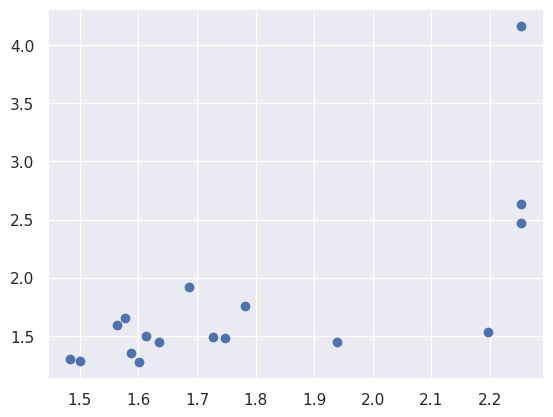

In [9]:
## try prediction
ytesting_pred = model(xtesting)
a = ytesting_pred.detach().numpy()

plt.scatter(a[:,0], ytesting[:,0])